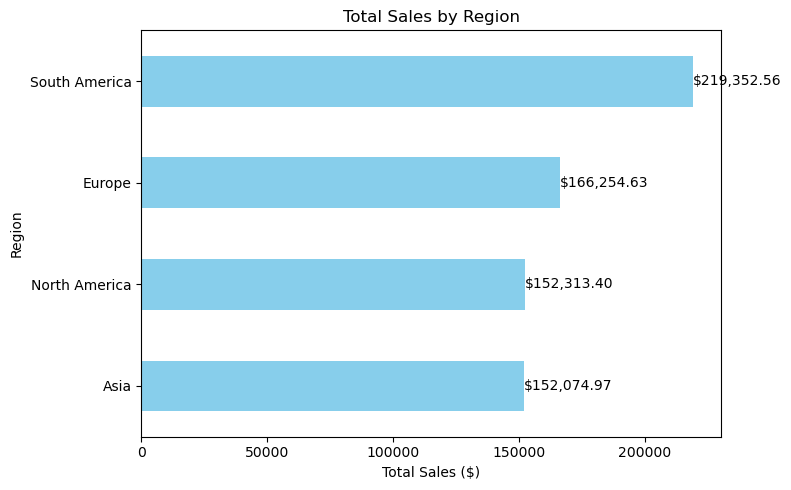

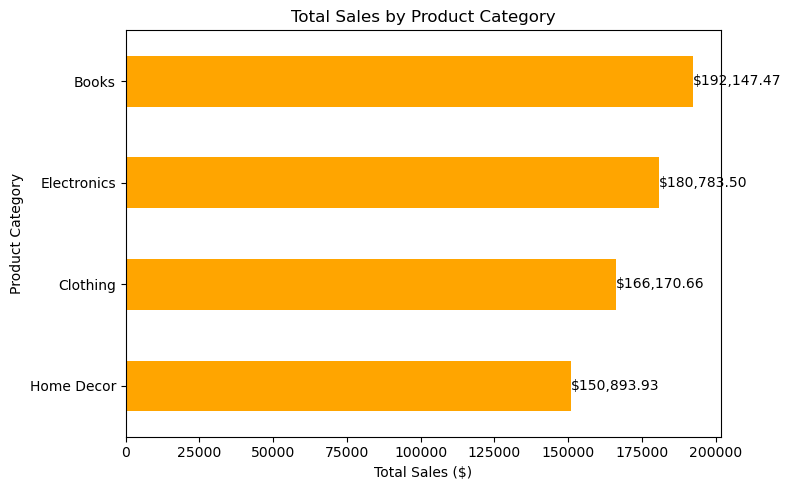

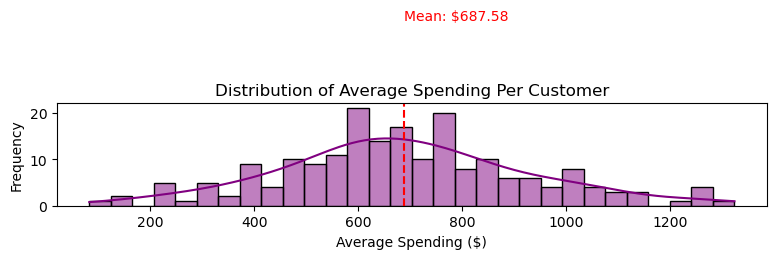

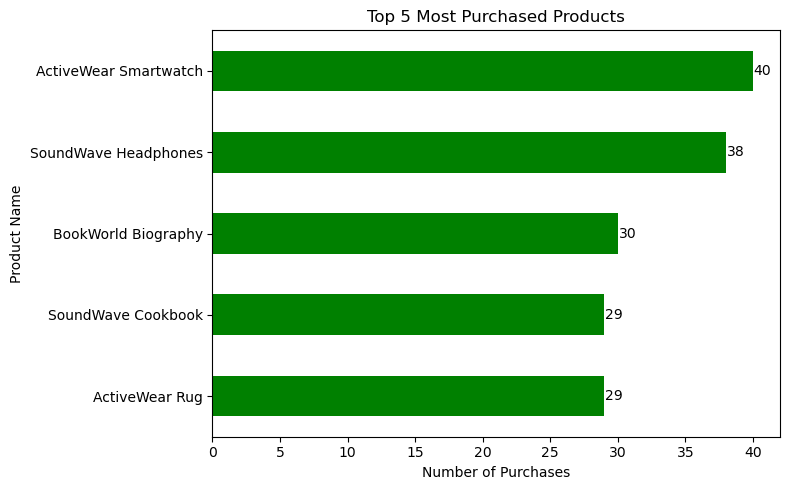

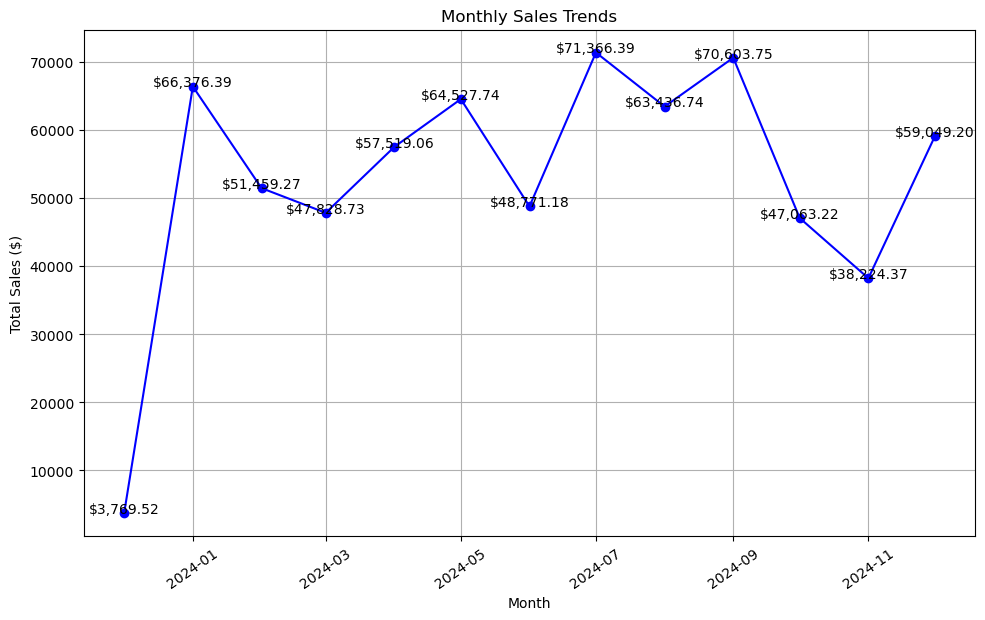

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

transactions_path = r"C:\Users\Keertipriya Bellary\Transactions.csv"
products_path = r"C:\Users\Keertipriya Bellary\Products.csv"
customers_path = r"C:\Users\Keertipriya Bellary\Customers.csv"

transactions_df = pd.read_csv(transactions_path)
products_df = pd.read_csv(products_path)
customers_df = pd.read_csv(customers_path)

# Step 2: Data Cleaning
transactions_df.fillna({'TotalValue': 0}, inplace=True)
products_df.fillna({'Category': 'Unknown'}, inplace=True)
customers_df.fillna({'Region': 'Unknown'}, inplace=True)

# Drop duplicates
transactions_df.drop_duplicates(inplace=True)
products_df.drop_duplicates(inplace=True)
customers_df.drop_duplicates(inplace=True)

# Merge datasets on common keys
merged_df = pd.merge(transactions_df, products_df, on="ProductID", how="left")
merged_df = pd.merge(merged_df, customers_df, on="CustomerID", how="left")

# Convert date columns to appropriate data types
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'], errors='coerce')
merged_df['SignupDate'] = pd.to_datetime(merged_df['SignupDate'], errors='coerce')

# Handle missing values after merging
merged_df.fillna({
    'ProductName': 'Unknown',
    'Category': 'Unknown',
    'Region': 'Unknown'
}, inplace=True)

# Handle infinite values: Replace inf with NaN
merged_df.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Removing invalid data: filter out transactions with negative TotalValue
merged_df = merged_df[merged_df['TotalValue'] >= 0]

# Feature engineering: Add Year-Month column for time-based analysis
merged_df['YearMonth'] = merged_df['TransactionDate'].dt.to_period('M')

# Step 3: Analysis
# 1. Total sales by region
sales_by_region = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# 2. Top-performing product categories
sales_by_category = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

# 3. Average spending per customer
avg_spending_per_customer = merged_df.groupby('CustomerID')['TotalValue'].mean().mean()

# 4. Most purchased products
most_purchased_products = merged_df['ProductName'].value_counts().head(5)

# 5. Monthly sales trends
monthly_sales = merged_df.groupby('YearMonth')['TotalValue'].sum()

# Step 4: Visualizations
# 1. Regional Sales: Bar Chart
plt.figure(figsize=(8, 5))
sales_by_region.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Total Sales ($)')
plt.ylabel('Region')

for index, value in enumerate(sales_by_region.sort_values().values):
    plt.text(value + 0.05, index, f'${value:,.2f}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

# 2. Top Product Categories: Bar Chart
plt.figure(figsize=(8, 5))
sales_by_category.sort_values().plot(kind='barh', color='orange')
plt.title('Total Sales by Product Category')
plt.xlabel('Total Sales ($)')
plt.ylabel('Product Category')

for index, value in enumerate(sales_by_category.sort_values().values):
    plt.text(value + 0.05, index, f'${value:,.2f}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

# 3. Average Spending Per Customer: Distribution Plot
plt.figure(figsize=(8, 5))
avg_spending = merged_df.groupby('CustomerID')['TotalValue'].mean()
sns.histplot(avg_spending, bins=30, kde=True, color='purple')
plt.title('Distribution of Average Spending Per Customer')
plt.xlabel('Average Spending ($)')
plt.ylabel('Frequency')

plt.axvline(avg_spending.mean(), color='red', linestyle='--')
plt.text(avg_spending.mean() + 0.05, 40, f'Mean: ${avg_spending.mean():,.2f}', color='red')

plt.tight_layout()
plt.show()

# 4. Most Purchased Products: Bar Chart
plt.figure(figsize=(8, 5))
most_purchased_products.sort_values().plot(kind='barh', color='green')
plt.title('Top 5 Most Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Name')

for index, value in enumerate(most_purchased_products.sort_values().values):
    plt.text(value + 0.05, index, f'{value}', va='center', ha='left', color='black')

plt.tight_layout()
plt.show()

# 5. Monthly Sales Trends: Line Chart
plt.figure(figsize=(10, 6))
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convert PeriodIndex to Timestamp for plotting
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)

for x, y in zip(monthly_sales.index, monthly_sales.values):
    plt.text(x, y + 0.05, f'${y:,.2f}', color='black', ha='center')

plt.tight_layout()
plt.xticks(rotation=35)  
plt.show()
